In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('HR_Comma_sep.csv')

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.shape

(14999, 10)

In [7]:
X = df.drop(['left', 'Department', 'salary'], axis = 1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [8]:
y = df['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [11]:
lr = LogisticRegression()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
lr.fit(X_train, y_train)

/Users/naveenkishorek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
predicted = lr.predict(X_test)

In [16]:
lr.score(X_test, y_test)

0.776

In [18]:
lr.predict([[0.90, 0.90, 5, 250, 4, 0, 1]])

/Users/naveenkishorek/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [25]:
lr.predict([[0.20, 0.10, 1, 800, 1, 0, 1]])

/Users/naveenkishorek/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [27]:
from sklearn.metrics import confusion_matrix

In [30]:
cm = confusion_matrix(y_test, predicted)

In [31]:
cm

array([[2152,  142],
       [ 530,  176]])

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(69.0, 0.5, 'truth')

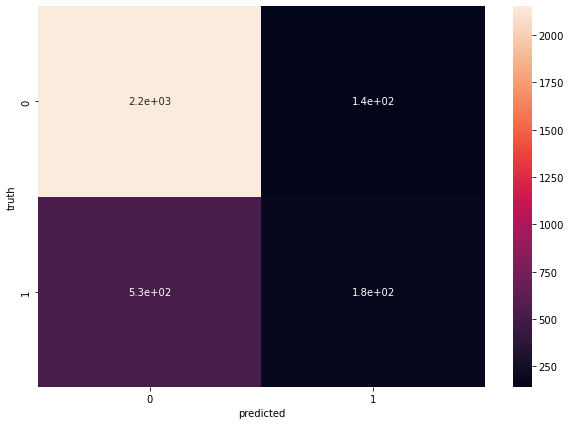

In [35]:
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')